place for installation

In [52]:
!py -m pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


place for library

In [53]:
import matplotlib.pyplot as plt
import numpy as np 
import PIL
import tensorflow as tf 
import pathlib

In [54]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data load and analitycs

In [55]:
# urlretrieve("https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip")
# # !unzip rockpaperscissors.zip

In [56]:
dir_image = pathlib.Path('rockpaperscissors')
image_count = len(list(dir_image.glob('*/*.png')))
image_count

2188

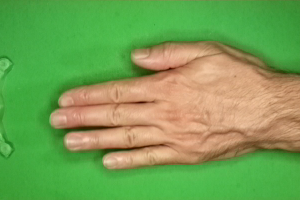

In [57]:
paper = list(dir_image.glob('paper/*'))
PIL.Image.open(str(paper[0]))

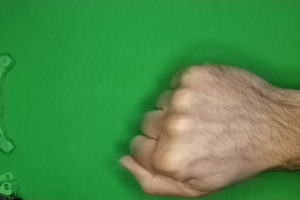

In [58]:
rock = list(dir_image.glob('rock/*'))
PIL.Image.open(str(rock[0]))

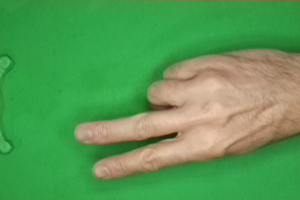

In [59]:
scissors = list(dir_image.glob('scissors/*'))
PIL.Image.open(str(scissors[0]))

In [60]:
batch_size = 32
img_height = 180
img_width = 180

In [61]:
train_dir = tf.keras.utils.image_dataset_from_directory(
    dir_image,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    subset='training',
    validation_split=0.2
)

Found 2188 files belonging to 3 classes.
Using 1751 files for training.


In [62]:
val_dir = tf.keras.utils.image_dataset_from_directory(
    dir_image,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    subset='validation',
    validation_split=0.2
)

Found 2188 files belonging to 3 classes.
Using 437 files for validation.


In [63]:
class_names = train_dir.class_names
class_names
# val_dir.class_names
# train_dir.take(1)


['paper', 'rock', 'scissors']

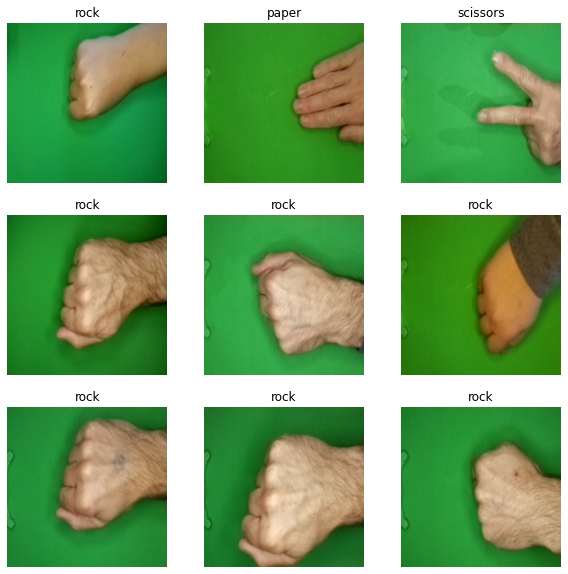

In [64]:
plt.figure(figsize=(10, 10))
for images, labels in train_dir.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

Preprocessing

In [65]:
autotune_size = tf.data.AUTOTUNE
train_dir = train_dir.cache().shuffle(1000).prefetch(buffer_size=autotune_size)
val_dir = val_dir.cache().prefetch(buffer_size=autotune_size)

In [66]:
normalization = layers.Rescaling(1./255)
train_normaliz = train_dir.map(lambda x, y: (normalization(x), y))
train_image, train_label = next(iter(train_normaliz))
firstly_img = train_image[0]
print(np.min(firstly_img), np.max(firstly_img))

0.0 0.964706


In [67]:
count_class = len(class_names)
count_class

3

In [68]:
x = tf.random.normal((4, 28, 28, 3))
y = tf.keras.layers.Conv2D(
2, 3, activation='relu', input_shape=(4, 28, 28, 3)[1:])(x)
print(y.shape)

(4, 26, 26, 2)


modeling

In [69]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width,3)),
    layers.Conv2D(16, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(count_class)
])

model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 64)       

In [71]:
train_image[i].numpy()

array([[[0.26456064, 0.5651417 , 0.19607845],
        [0.26557735, 0.56535953, 0.20000002],
        [0.25374004, 0.56412494, 0.19092232],
        ...,
        [0.3384171 , 0.5949893 , 0.2326799 ],
        [0.3379085 , 0.5938998 , 0.23137257],
        [0.3484386 , 0.6027597 , 0.2388526 ]],

       [[0.25141615, 0.5729848 , 0.19673204],
        [0.24901962, 0.5777778 , 0.20130719],
        [0.25620916, 0.5764706 , 0.19215688],
        ...,
        [0.2915032 , 0.620915  , 0.23267967],
        [0.28431374, 0.6248366 , 0.23267975],
        [0.29411754, 0.627451  , 0.2326798 ]],

       [[0.25250545, 0.57625276, 0.20072623],
        [0.25555557, 0.5821351 , 0.2056645 ],
        [0.25584608, 0.57792306, 0.19578795],
        ...,
        [0.29077697, 0.62309366, 0.233769  ],
        [0.29193902, 0.6302833 , 0.23594773],
        [0.29375443, 0.6278141 , 0.23013802]],

       ...,

       [[0.22396521, 0.5776324 , 0.1911401 ],
        [0.22810467, 0.5786492 , 0.19215688],
        [0.22214971, 0

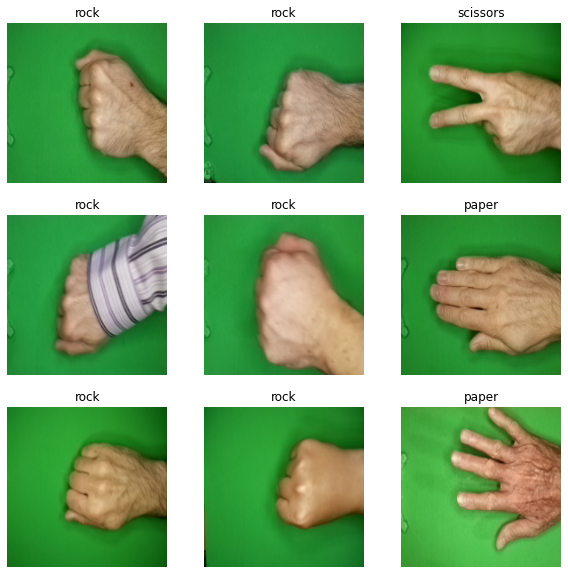

In [72]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_image[i].numpy())
    plt.title(class_names[train_label[i]])
    plt.axis('off')

In [73]:
train_history = model.fit(
    train_dir,
    validation_data=val_dir,
    epochs=10
)

train_history

Epoch 1/10
55/55 [==============================] - 61s 985ms/step - loss: 1.0967 - accuracy: 0.5089 - val_loss: 0.6081 - val_accuracy: 0.7872
Epoch 2/10
55/55 [==============================] - 56s 1s/step - loss: 0.4585 - accuracy: 0.8401 - val_loss: 0.2784 - val_accuracy: 0.9016
Epoch 3/10
55/55 [==============================] - 26s 477ms/step - loss: 0.2194 - accuracy: 0.9229 - val_loss: 0.1555 - val_accuracy: 0.9542
Epoch 4/10
55/55 [==============================] - 27s 494ms/step - loss: 0.1190 - accuracy: 0.9566 - val_loss: 0.1783 - val_accuracy: 0.9428
Epoch 5/10
55/55 [==============================] - 28s 501ms/step - loss: 0.0729 - accuracy: 0.9760 - val_loss: 0.1402 - val_accuracy: 0.9588
Epoch 6/10
55/55 [==============================] - 29s 532ms/step - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.1471 - val_accuracy: 0.9588
Epoch 7/10
55/55 [==============================] - 28s 516ms/step - loss: 0.0181 - accuracy: 0.9937 - val_loss: 0.2180 - val_accuracy: 0.9565
Ep

In [88]:
def showAllValueOfHistory(history, epochs_range):
    epochs_range = range(epochs_range)
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training & Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training & Validation Loss')
    return plt.show()

visualization model

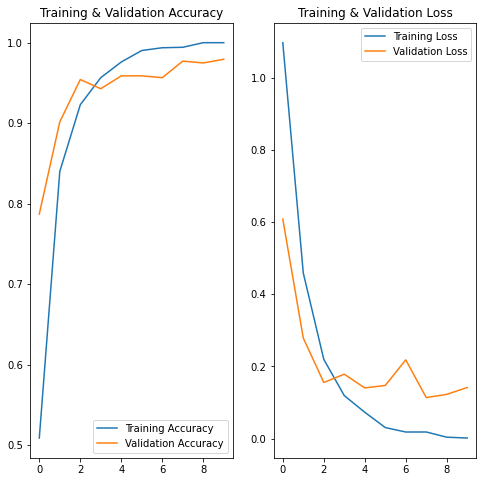

In [89]:
plottingModel = showAllValueOfHistory(train_history, 10)
plottingModel

In [76]:
# Model training dan akurasi meleset dengan margin beda beberapa angka, dengan validasi sekitar 0.9 maka dinyatakan model tsb tidak overfitt
# overfitt jika perbedaan train dan val signifikan
# model yg baik adalah train dan val itu sama ataupun berbeda tipis
# bagaimana mengatasi overfitt supaya jarak train dan validasi tidak terlihat jelas ? 2 cara yaitu data augmented atau menggunakan dropout

Data augmented and dropout way

In [77]:
augmented_secton = Sequential(
    [
        layers.RandomFlip('horizontal', input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1)
    ]
)

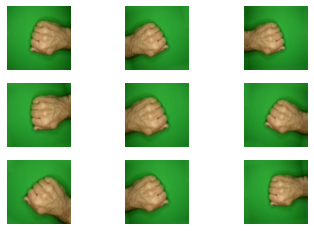

In [78]:
for image, labels in train_dir.take(1):
    for i in range(9):
        augmented = augmented_secton(image)
        # print(augmented[0])
        plt.subplot(3, 3, i+1)
        plt.imshow(augmented[6].numpy().astype('uint8')) #bisa index 1, 0, dan 2 sesuai class code
        plt.axis('off')


In [79]:
modelAfterAugmented = Sequential(
    [
        augmented_secton,
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(count_class, name='outputs')
    ]
)

In [85]:
modelAfterAugmented.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [86]:
modelAfterAugmented.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [87]:
epochsAugmented = 15
historyAugmented = modelAfterAugmented.fit(
    train_dir,
    validation_data=val_dir,
    epochs=epochsAugmented
)

Epoch 1/15
55/55 [==============================] - 39s 688ms/step - loss: 1.0670 - accuracy: 0.4557 - val_loss: 0.6967 - val_accuracy: 0.7666
Epoch 2/15
55/55 [==============================] - 33s 593ms/step - loss: 0.7073 - accuracy: 0.7293 - val_loss: 0.4191 - val_accuracy: 0.8467
Epoch 3/15
55/55 [==============================] - 33s 591ms/step - loss: 0.4240 - accuracy: 0.8441 - val_loss: 0.2508 - val_accuracy: 0.9199
Epoch 4/15
55/55 [==============================] - 33s 592ms/step - loss: 0.3236 - accuracy: 0.8789 - val_loss: 0.1754 - val_accuracy: 0.9268
Epoch 5/15
55/55 [==============================] - 32s 589ms/step - loss: 0.2692 - accuracy: 0.9052 - val_loss: 0.1754 - val_accuracy: 0.9405
Epoch 6/15
55/55 [==============================] - 32s 583ms/step - loss: 0.2075 - accuracy: 0.9263 - val_loss: 0.1000 - val_accuracy: 0.9703
Epoch 7/15
55/55 [==============================] - 32s 581ms/step - loss: 0.1533 - accuracy: 0.9503 - val_loss: 0.1315 - val_accuracy: 0.9519

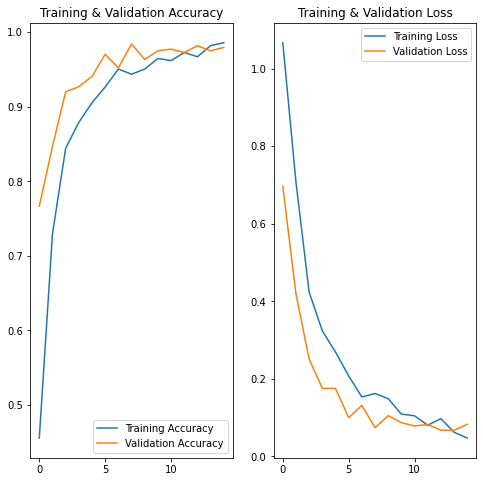

In [91]:
plottingModelAugmented = showAllValueOfHistory(historyAugmented, 15)
plottingModelAugmented

In [97]:
model.save('model/model_nonaugmented.h5')
modelAfterAugmented.save('model/model_augmented.h5')

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Predict Image from reality

In [132]:
def predictAModel(modelUWant, nameOfClass, indexOfImage: int):
    input_path = pathlib.Path('input')
    arrayOfInput = list(input_path.glob('*'))

    load_img = tf.keras.utils.load_img(
        arrayOfInput[indexOfImage], target_size=(img_height, img_width)
    )

    print('urutan file input: ', arrayOfInput, '\n\nfilename terpilih: ', arrayOfInput[indexOfImage])

    imgToArray = tf.keras.utils.img_to_array(load_img)
    imgToArray = tf.expand_dims(imgToArray, 0)

    pred = modelUWant.predict(imgToArray)
    score = tf.nn.softmax(pred[0])

    print('pred', pred)
    print('score', score, 'argmax', np.argmax(score))

    return 'Gambar ini mendekati akurasi untuk class {} dengan score {:.2f} %'.format(nameOfClass[np.argmax(score)], 100*np.max(score))


In [133]:
predictAModel(modelAfterAugmented, class_names, 1)

urutan file input:  [WindowsPath('input/0bioBZYFCXqJIulm.png'), WindowsPath('input/0ePX1wuCc3et7leL.png'), WindowsPath('input/paper.jpeg'), WindowsPath('input/rock.jpeg'), WindowsPath('input/scissor.jpeg')] 

filename terpilih:  input\0ePX1wuCc3et7leL.png
1/1 [==============================] - 0s 28ms/step
pred [[  1.6590768 -11.854399   11.173482 ]]
score tf.Tensor([7.3775860e-05 9.9789774e-11 9.9992621e-01], shape=(3,), dtype=float32) argmax 2


'Gambar ini mendekati akurasi untuk class scissors dengan score 99.99 %'